# 逻辑回归代码实现

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import accuracy_score

##### 加载数据的函数

In [14]:
def loaddata():
    data = np.loadtxt('data/data1.txt',delimiter=',')
    n = data.shape[1] - 1  # 特征数
    X = data[:, 0:n]
    y = data[:, -1].reshape(-1, 1)
    return X, y

##### 画散点图

In [15]:
def plot(X,y):
    pos = np.where(y==1)
    neg = np.where(y==0)
    plt.scatter(X[pos[0],0],X[pos[0],1],marker='x')
    plt.scatter(X[neg[0], 0], X[neg[0], 1], marker='o')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.show()

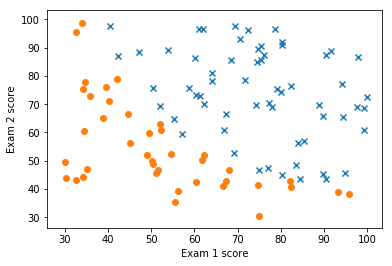

In [16]:
X,y = loaddata()
plot(X,y)

##### 实现sigmoid函数
<img src="images/01.png" width="200" align="left"/>

In [17]:
def sigmoid(z):
    r = 1/(1+np.exp(-z))
    return r

##### 实现假设函数
<img src="images/02.png" width="200" align="left"/>

In [18]:
def hypothesis(X,theta):
    z=np.dot(X,theta)
    return sigmoid(z)

##### 损失函数
<img src="images/03.png" width="250" align="left"/>
<br/>
##### <font color='red'>成本函数（改变处）</font>
  
<img src="images/05.png" width="400" align="left"/>

In [19]:
#多传入lambd
def computeCost(X,y,theta,lambd):
    m = X.shape[0]
    z = -1*y*np.log(hypothesis(X,theta))-(1-y)*np.log(1-hypothesis(X,theta))
    #下面返回值的代码要改
    #return np.sum(z)/m
    return np.sum(z)/m+(lambd/2*m)+np.sum(np.power(theta,2))

##### <font color='red'>梯度下降法求解(有变化)</font>
<img src="images/04.png" width="250" align="left"/>
<br>
<br>   
改变为：

<img src="images/06.png" width="250" align="left"/>

In [20]:
def gradientDescent(X,y,theta,iterations,alpha,lambd):
    #取数据条数
    m = X.shape[0]
    #在x最前面插入全1的列
    X = np.hstack((np.ones((m, 1)), X))
    for i in range(iterations):
        for j in range(len(theta)):
            #下面的迭代公式要改
            #theta[j] = theta[j]-(alpha/m)*np.sum((hypothesis(X,theta) - y)*X[:,j].reshape(-1,1))
            theta[j] = theta[j]-(alpha/m)*(np.sum((hypothesis(X,theta) - y)*X[:,j].reshape(-1,1))+lambd*theta[j])
        #每迭代1000次输出一次损失值
        if(i%10000==0):
            print('第',i,'次迭代，当前损失为：',computeCost(X,y,theta,lambd),'theta=',theta)
    return theta

##### 预测函数

In [21]:
def predict(X):
    # 在x最前面插入全1的列
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X, 0, values=c, axis=1)  
    #求解假设函数的值
    h = hypothesis(X,theta)
    #根据概率值决定最终的分类,>=0.5为1类，<0.5为0类
    h[h>=0.5]=1
    h[h<0.5]=0
    return h

In [22]:
X,y = loaddata()

In [23]:
n = X.shape[1]#特征数
theta = np.zeros(n+1).reshape(n+1, 1)  # theta是列向量,+1是因为求梯度时X前会增加一个全1列
iterations = 250000
alpha = 0.008

In [24]:
theta = gradientDescent(X,y,theta,iterations,alpha,0.01)
print('theta=\n',theta)

第 0 次迭代，当前损失为： 4.02820292825309 theta= [[ 0.0008    ]
 [ 0.0959687 ]
 [-0.17080118]]
第 10000 次迭代，当前损失为： 37.9305664041274 theta= [[-5.97396642]
 [ 0.03494948]
 [ 0.00734691]]
第 20000 次迭代，当前损失为： 122.99325207992867 theta= [[-10.99045142]
 [ -0.0957601 ]
 [  0.25509445]]
第 30000 次迭代，当前损失为： 211.38567461982993 theta= [[-14.47603256]
 [  0.24101975]
 [  0.08375873]]
第 40000 次迭代，当前损失为： 305.35748570655375 theta= [[-17.43209425]
 [  0.26455879]
 [  0.08760486]]
第 50000 次迭代，当前损失为： 374.9974302913847 theta= [[-19.33019256]
 [  0.1848856 ]
 [  0.1962559 ]]
第 60000 次迭代，当前损失为： 427.82439150916014 theta= [[-20.65128186]
 [  0.3170618 ]
 [  0.04350708]]
第 70000 次迭代，当前损失为： 467.24025184269874 theta= [[-21.59058274]
 [  0.09375762]
 [  0.23119576]]
第 80000 次迭代，当前损失为： 500.8977740770468 theta= [[-22.35637706]
 [  0.11682465]
 [  0.27621063]]
第 90000 次迭代，当前损失为： 528.4776448348186 theta= [[-22.96485411]
 [  0.28047518]
 [  0.08323508]]
第 100000 次迭代，当前损失为： 551.1099996786344 theta= [[-23.45384231]
 [  0.11660825]


##### 画决策边界

In [25]:
def plotDescisionBoundary(X,y,theta):
    cm_dark = mpl.colors.ListedColormap(['g', 'r'])
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.scatter(X[:,0],X[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)

    #化分类决策面 theta0+theta1*x1+theta2*x2 = 0
    # x1 = np.arange(20,110,0.1)
    x1 = np.arange(min(X[:, 0]), max(X[:, 0]), 0.1)
    x2 = -(theta[1]*x1+theta[0])/theta[2]
    plt.plot(x1,x2)
    plt.show()

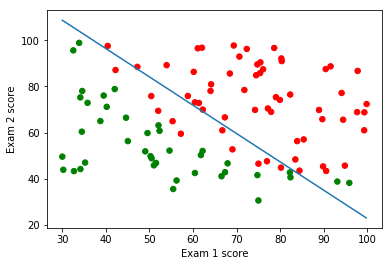

In [26]:
plotDescisionBoundary(X,y,theta)

In [28]:
p = predict(X)
print('准确度：',accuracy_score(y,p))

准确度： 0.88
